Based on https://scanpy.readthedocs.io/en/stable/tutorials/basics/integrating-data-using-ingest.html

# BBKNN (Batch Balanced K-Nearest Neighbors)
**Definition**:

BBKNN is a method for synchronizing single-cell data from different categories using a method based on nearest neighbors (KNN). The main goal of BBKNN is to remove batch effects in single cell data.

**Attributes:**

Removing batch effects: BBKNN is used to synchronize batches and reduce batch effects.
Using Nearest Neighbors: Creates a common space between categories by using the nearest neighbors in each category.
Simple application: It can be easily used in the scanpy library.

# ingest
**Definition:**

The ingest function in scanpy is used to merge a new batch of single-cell data with a reference batch of previous data. This method is particularly useful for adding new data to a reference data set without having to recalculate the entire data.

**Attributes:**

Add new data: ingest is used to add new categories of data to the reference data set.
Preservation of reference data: updating data without having to recalculate the reference data.
Synchronization with reference data: using existing training models to synchronize new data with reference data.

## Comparison between BBKNN and ingest in Single-cell Data Integration

| Feature           | BBKNN                                     | ingest                                   |
|-------------------|-------------------------------------------|--------------------------------------------|
| Purpose           | Remove batch effects                      | Integrate new data with reference data     |
| Method            | Uses batch-balanced K-nearest neighbors   | Uses existing models to align new data     |
| Main Use Case     | Harmonizing data from different batches   | Adding new data to a reference dataset     |
| Computational Complexity | Requires computation of K-nearest neighbors | Reuses existing computations               |
| Usage in Scanpy   | `bbknn.bbknn(adata, batch_key='batch')`    | `sc.tl.ingest(adata_new, adata_ref, obs='cell_type')` |


In [1]:
!pip install --q scanpy
!pip install --q anndata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00


In [3]:
import scanpy as sc
import pandas as pd

In [5]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor="white")



---

# PBMC Datasets

In [6]:
# this is an earlier version of the dataset from the pbmc3k tutorial
adata_ref = sc.datasets.pbmc3k_processed()
adata = sc.datasets.pbmc68k_reduced()

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

In [10]:
print(adata_ref)
print("\n")
print(adata)

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [12]:
# need to be defined on the same variables
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [19]:
print(var_names)
print(adata_ref.n_vars)
print(adata.n_vars)

Index(['TNFRSF4', 'SRM', 'TNFRSF1B', 'EFHD2', 'C1QA', 'C1QB', 'STMN1',
       'MARCKSL1', 'SMAP2', 'PRDX1',
       ...
       'EIF3D', 'LGALS2', 'ADSL', 'TTC38', 'TYMP', 'ATP5O', 'TTC3', 'SUMO3',
       'S100B', 'PRMT2'],
      dtype='object', name='index', length=208)
208
208


In [20]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


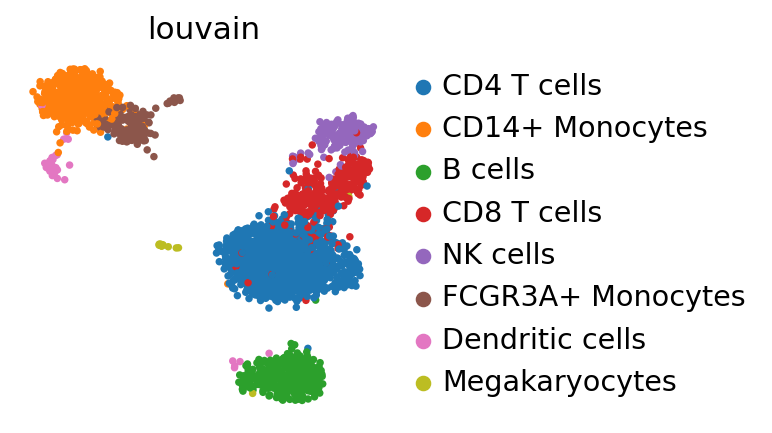

In [22]:
sc.pl.umap(adata_ref, color="louvain")



---

# Mapping PBMCs using ingest

In [24]:
sc.tl.ingest(adata, adata_ref, obs="louvain")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/lib/python3.10/_collections_abc.py:999: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/usr/lib/python3.10/_collections_abc.py:999: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]
/usr/lib/python3.10/_collections_abc.py:999: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  self[key] = other[key]


In [25]:
adata.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]  # fix colors

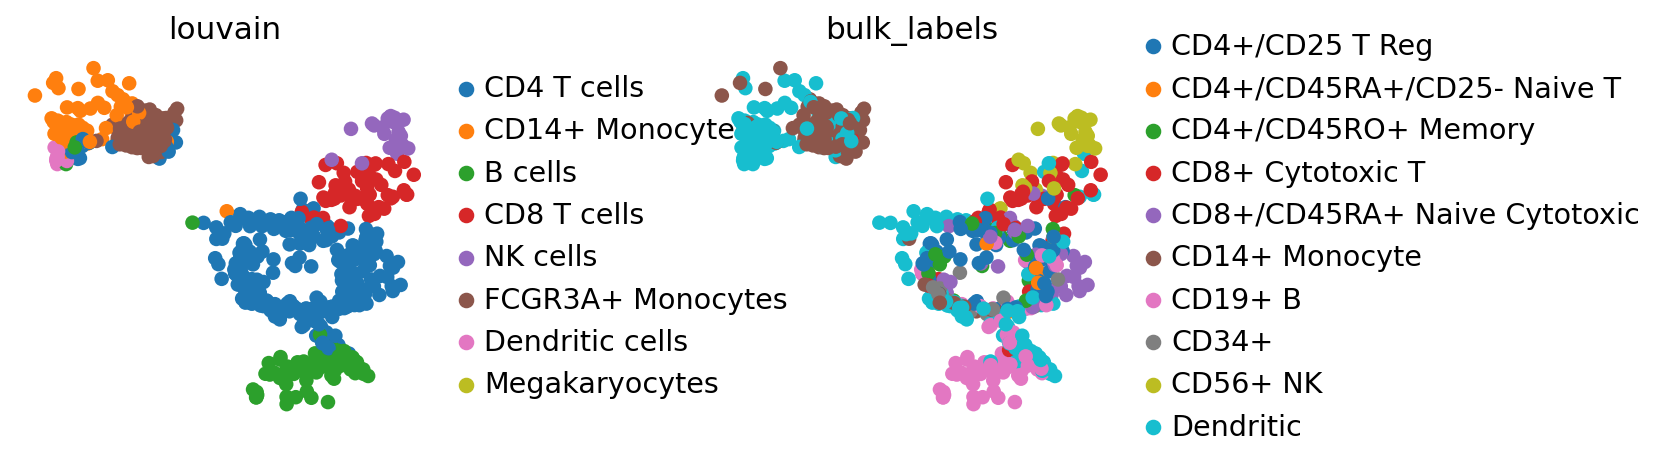

In [26]:
sc.pl.umap(adata, color=["louvain", "bulk_labels"], wspace=0.5)

In [31]:
adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])

<ipython-input-31-7f7072445b8b>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_ref.concatenate(adata, batch_categories=["ref", "new"])


In [33]:
adata_concat.obs.louvain = adata_concat.obs.louvain.astype("category")
# fix category ordering
adata_concat.obs.louvain.cat.reorder_categories(
    adata_ref.obs.louvain.cat.categories
)
# fix category colors
adata_concat.uns["louvain_colors"] = adata_ref.uns["louvain_colors"]

In [34]:
adata_concat

AnnData object with n_obs × n_vars = 3338 × 208
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'bulk_labels', 'S_score', 'G2M_score', 'phase', 'batch'
    var: 'n_counts-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'highly_variable-new', 'n_cells-ref'
    uns: 'louvain_colors'
    obsm: 'X_pca', 'X_umap'

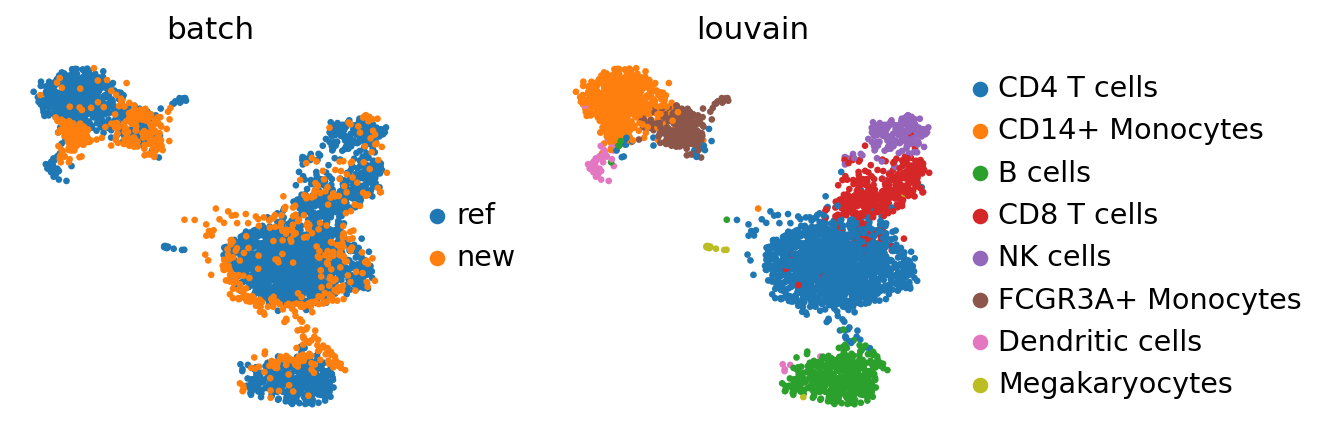

In [35]:
sc.pl.umap(adata_concat, color=["batch", "louvain"])



---

# Mapping PBMCs using BBKNN

In [36]:
sc.tl.pca(adata_concat)

In [39]:
!pip install --q bbknn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [41]:
%%time
sc.external.pp.bbknn(adata_concat, batch_key="batch")  # running bbknn 1.3.6

CPU times: user 246 ms, sys: 3.94 ms, total: 250 ms
Wall time: 237 ms


In [42]:
sc.tl.umap(adata_concat)

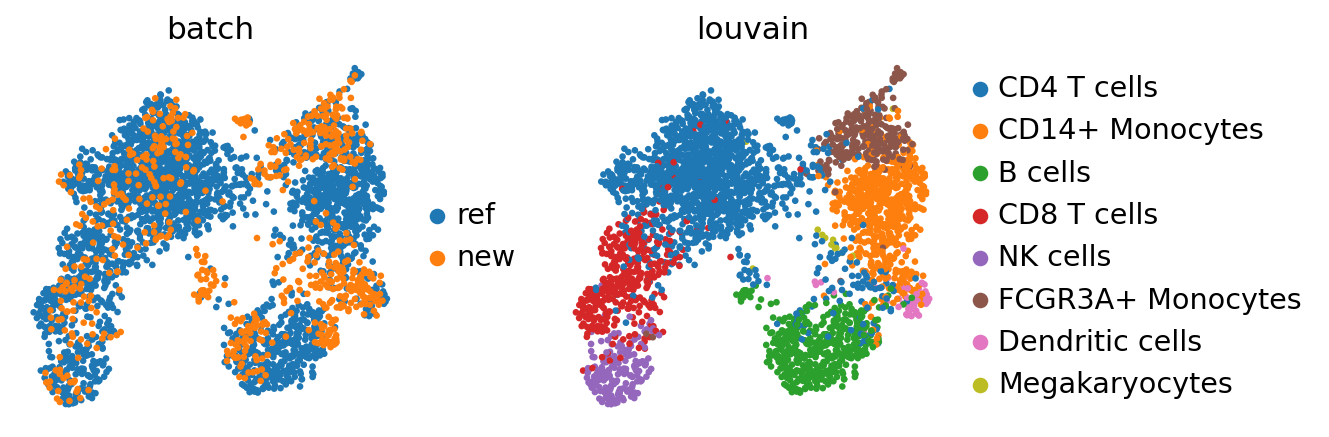

In [43]:
sc.pl.umap(adata_concat, color=["batch", "louvain"])



---

# Pancreas Dataset
It contains data for human pancreas from 4 different studies (Segerstolpe, Baron, Wang, Muraro)

In [44]:
# note that this collection of batches is already intersected on the genes
adata_all = sc.read(
    "data/pancreas.h5ad",
    backup_url="https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1",
)

  0%|          | 0.00/176M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/usr/local/lib/python3.10/dist-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [46]:
adata_all

AnnData object with n_obs × n_vars = 14693 × 2448
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'
    var: 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3'
    uns: 'celltype_colors', 'louvain', 'neighbors', 'pca', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [47]:
counts = adata_all.obs.celltype.value_counts()
counts

celltype
alpha                     4214
beta                      3354
ductal                    1804
acinar                    1368
not applicable            1154
delta                      917
gamma                      571
endothelial                289
activated_stellate         284
dropped                    178
quiescent_stellate         173
mesenchymal                 80
macrophage                  55
PSC                         54
unclassified endocrine      41
co-expression               39
mast                        32
epsilon                     28
mesenchyme                  27
schwann                     13
t_cell                       7
MHC class II                 5
unclear                      4
unclassified                 2
Name: count, dtype: int64

In [49]:
minority_classes = counts.index[-5:].tolist()  # get the minority classes
adata_all = adata_all[~adata_all.obs.celltype.isin(minority_classes)]  # actually subset
adata_all.obs.celltype.cat.reorder_categories(  # reorder according to abundance
    counts.index[:-5].tolist()
)

index
human1_lib1.final_cell_0001-0     acinar
human1_lib1.final_cell_0002-0     acinar
human1_lib1.final_cell_0003-0     acinar
human1_lib1.final_cell_0004-0     acinar
human1_lib1.final_cell_0005-0     acinar
                                  ...   
reads.29499-3                     ductal
reads.29500-3                     ductal
reads.29501-3                       beta
reads.29502-3                    dropped
reads.29503-3                       beta
Name: celltype, Length: 14662, dtype: category
Categories (19, object): ['alpha', 'beta', 'ductal', 'acinar', ..., 'co-expression', 'mast',
                          'epsilon', 'mesenchyme']

In [51]:
%%time
sc.pp.pca(adata_all)
sc.pp.neighbors(adata_all)
sc.tl.umap(adata_all)

CPU times: user 29.5 s, sys: 4.39 s, total: 33.9 s
Wall time: 30.7 s


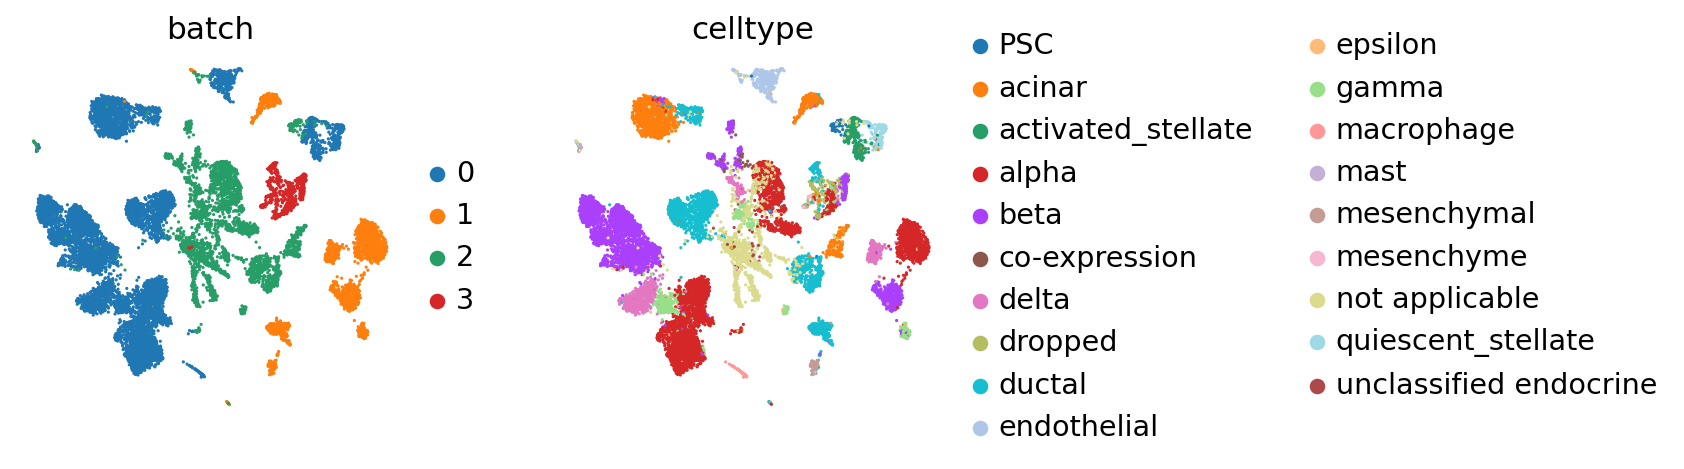

In [52]:
sc.pl.umap(
    adata_all, color=["batch", "celltype"], palette=sc.pl.palettes.vega_20_scanpy
)

---

# Mapping Pancreas using BBKNN

In [53]:
%%time
sc.external.pp.bbknn(adata_all, batch_key="batch")

CPU times: user 1.68 s, sys: 7.99 ms, total: 1.68 s
Wall time: 1.64 s


In [54]:
sc.tl.umap(adata_all)

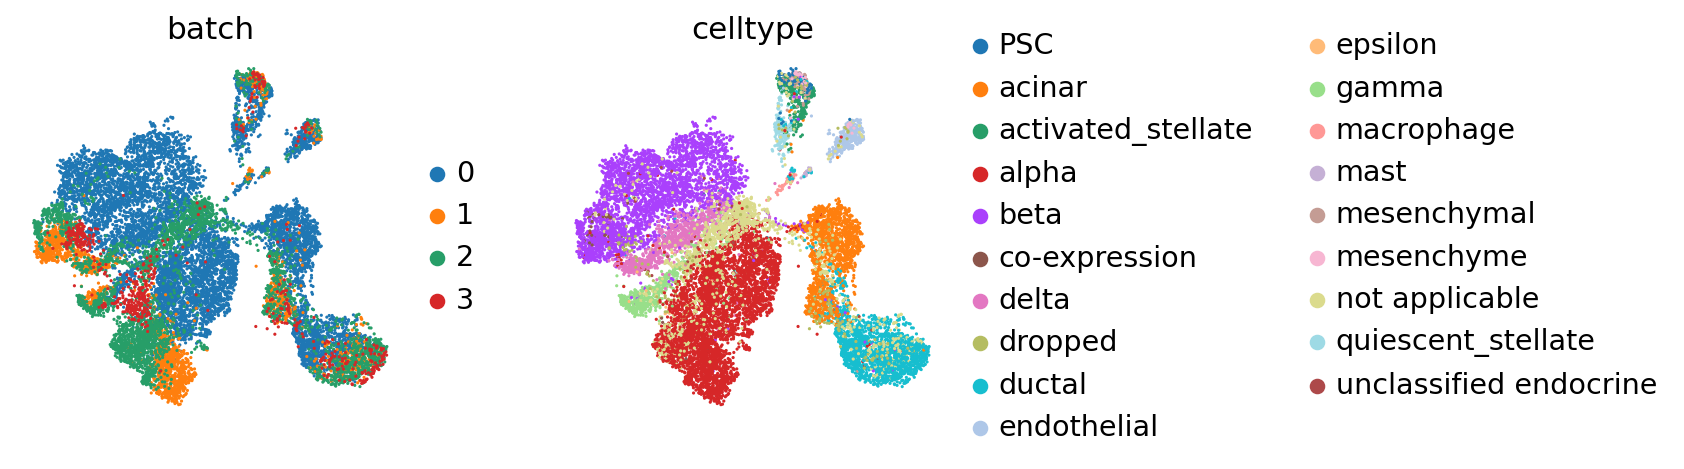

In [55]:
sc.pl.umap(adata_all, color=["batch", "celltype"])



---

# Mapping onto a reference batch using ingest

In [56]:
adata_ref = adata_all[adata_all.obs.batch == "0"]

In [57]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


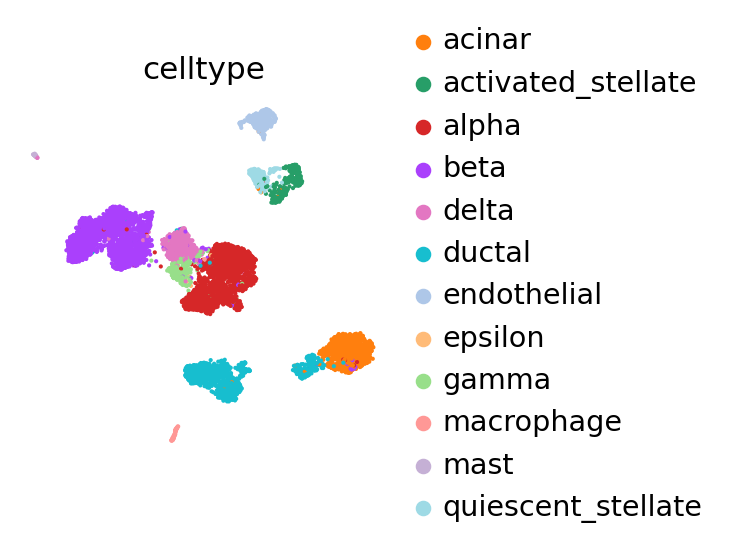

In [58]:
sc.pl.umap(adata_ref, color="celltype")

In [59]:
adatas = [adata_all[adata_all.obs.batch == i].copy() for i in ["1", "2", "3"]]

In [60]:
sc.settings.verbosity = 2  # a bit more logging
for iadata, adata in enumerate(adatas):
    print(f"... integrating batch {iadata+1}")
    adata.obs["celltype_orig"] = adata.obs.celltype  # save the original cell type
    sc.tl.ingest(adata, adata_ref, obs="celltype")

... integrating batch 1
running ingest


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


    finished (0:00:05)
... integrating batch 2
running ingest


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


    finished (0:00:08)
... integrating batch 3
running ingest


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


    finished (0:00:03)


In [61]:
adata_concat = adata_ref.concatenate(adatas)

<ipython-input-61-db50d10ffa6c>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_ref.concatenate(adatas)


In [63]:
adata_concat.obs.celltype = adata_concat.obs.celltype.astype("category")
# fix category ordering
adata_concat.obs.celltype.cat.reorder_categories(
    adata_ref.obs.celltype.cat.categories
)
# fix category coloring
adata_concat.uns["celltype_colors"] = adata_ref.uns["celltype_colors"]

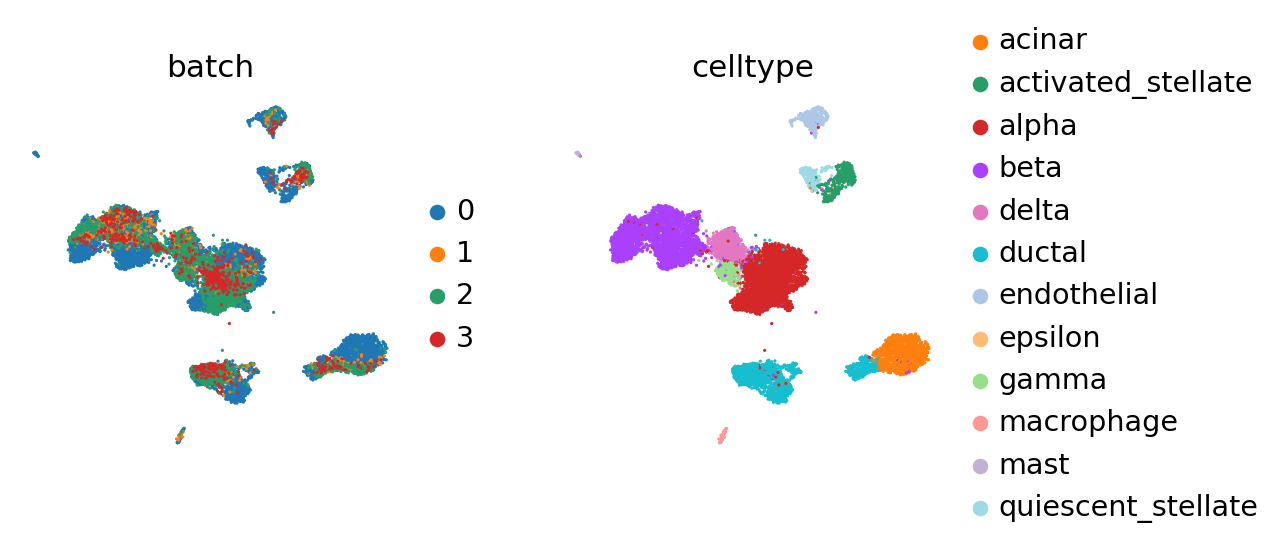

In [64]:
sc.pl.umap(adata_concat, color=["batch", "celltype"])



---

# Evaluating consistency

In [65]:
adata_query = adata_concat[adata_concat.obs.batch.isin(["1", "2", "3"])]

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


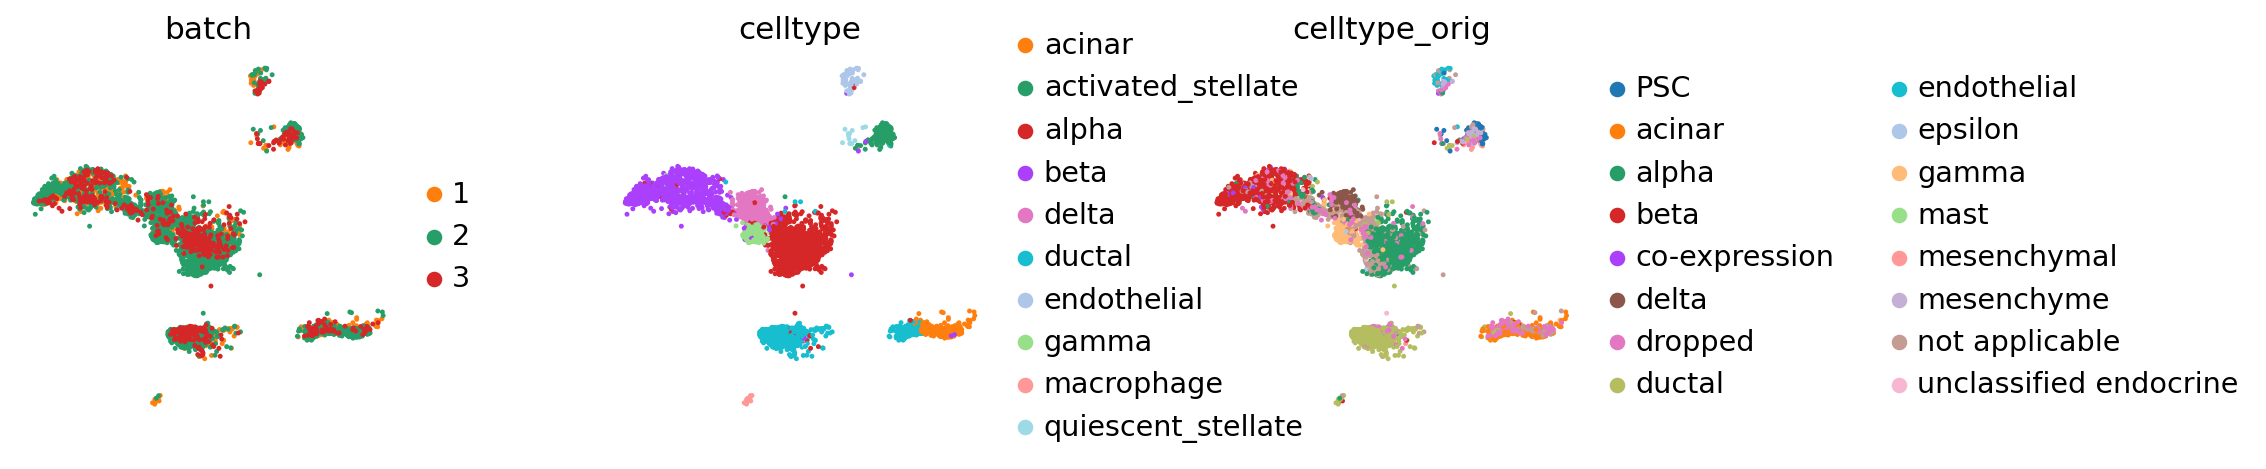

In [66]:
sc.pl.umap(adata_query, color=["batch", "celltype", "celltype_orig"], wspace=0.4)

In [73]:
obs_query = adata_query.obs
# intersected categories
conserved_categories = obs_query.celltype.cat.categories.intersection(
    obs_query.celltype_orig.cat.categories
)
# intersect categories
obs_query_conserved = obs_query.loc[
    obs_query.celltype.isin(conserved_categories)
    & obs_query.celltype_orig.isin(conserved_categories)
]
# remove unused categories
obs_query_conserved.celltype.cat.remove_unused_categories()
# remove unused categories
obs_query_conserved.celltype_orig.cat.remove_unused_categories()

index
D28.1_1-1-1              alpha
D28.1_13-1-1            ductal
D28.1_15-1-1             alpha
D28.1_17-1-1             alpha
D28.1_2-1-1        endothelial
                      ...     
reads.29498-3-3         ductal
reads.29499-3-3         ductal
reads.29500-3-3         ductal
reads.29501-3-3           beta
reads.29503-3-3           beta
Name: celltype_orig, Length: 4496, dtype: category
Categories (7, object): ['acinar', 'alpha', 'beta', 'delta', 'ductal', 'endothelial', 'gamma']

In [74]:
pd.crosstab(obs_query_conserved.celltype, obs_query_conserved.celltype_orig)

celltype_orig,acinar,alpha,beta,delta,ductal,endothelial,gamma
celltype,,,,,,,
acinar,165,2,3,0,3,0,3
alpha,1,1811,3,1,13,0,20
beta,1,56,806,10,6,0,37
delta,0,6,3,305,2,0,72
ductal,241,7,6,0,684,0,0
endothelial,0,2,0,0,0,36,0
gamma,1,1,5,0,0,0,184


In [75]:
pd.crosstab(adata_query.obs.celltype, adata_query.obs.celltype_orig)

celltype_orig,PSC,acinar,alpha,beta,co-expression,delta,dropped,ductal,endothelial,epsilon,gamma,mast,mesenchymal,mesenchyme,not applicable,unclassified endocrine
celltype,,,,,,,,,,,,,,,,
acinar,0,165,2,3,0,0,24,3,0,0,3,0,0,0,92,0
activated_stellate,48,1,1,1,0,0,11,6,0,0,0,0,78,20,17,0
alpha,0,1,1811,3,2,1,37,13,0,3,20,7,0,0,311,10
beta,1,1,56,806,37,10,42,6,0,0,37,0,0,1,518,24
delta,0,0,6,3,0,305,13,2,0,6,72,0,0,0,96,7
ductal,0,241,7,6,0,0,38,684,0,0,0,0,2,0,96,0
endothelial,1,0,2,0,0,0,6,0,36,0,0,0,0,6,7,0
gamma,0,1,1,5,0,0,2,0,0,1,184,0,0,0,15,0
macrophage,0,0,1,1,0,0,0,12,0,0,0,0,0,0,1,0


In [76]:
sc.tl.embedding_density(adata_concat, groupby="batch")

computing density on 'umap'


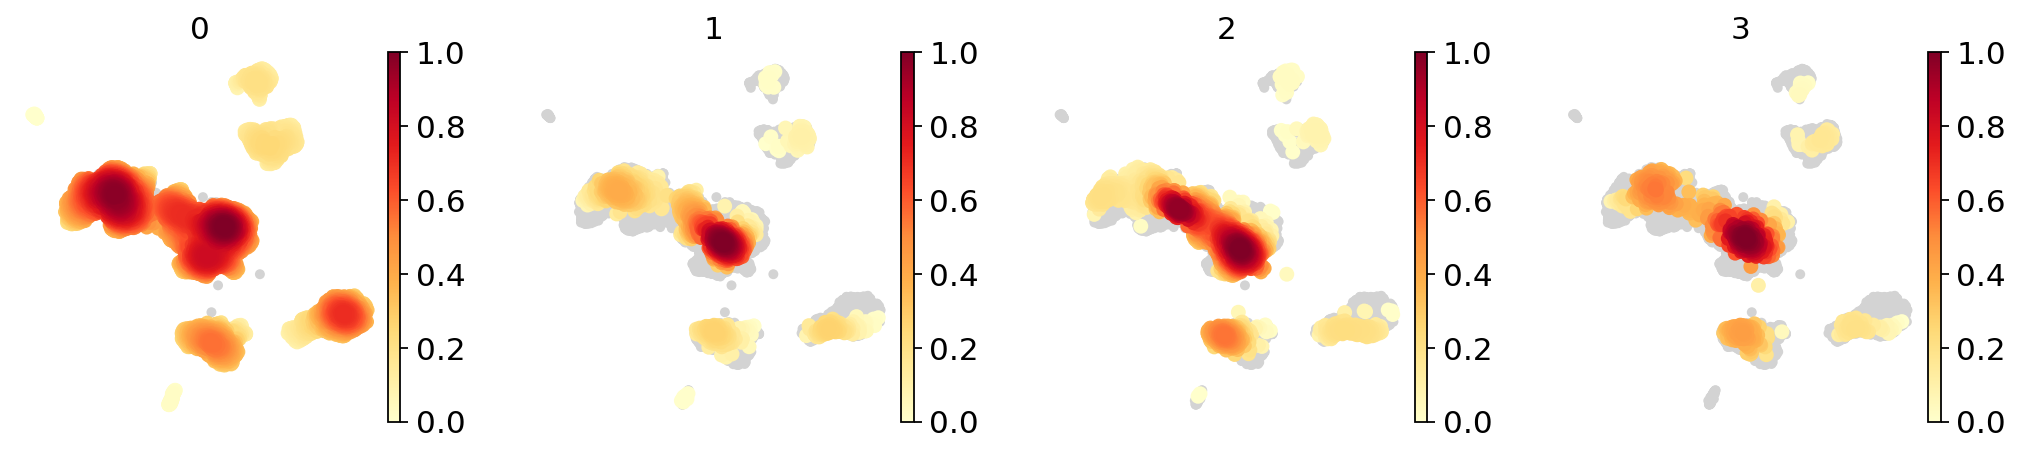

In [77]:
sc.pl.embedding_density(adata_concat, groupby="batch")

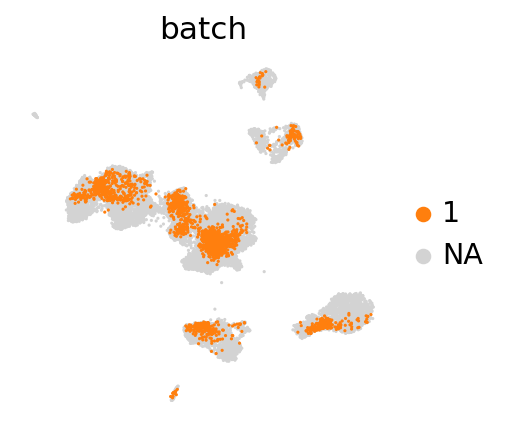

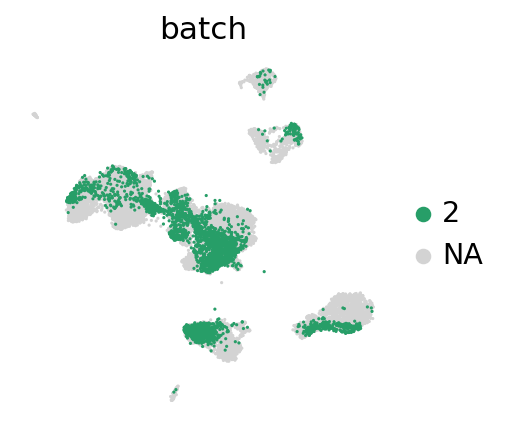

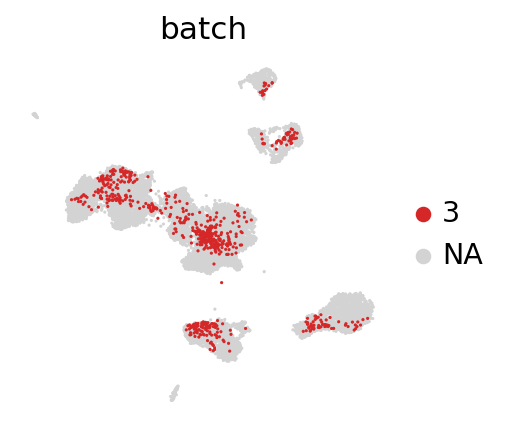

In [78]:
for batch in ["1", "2", "3"]:
    sc.pl.umap(adata_concat, color="batch", groups=[batch])